<a href="https://colab.research.google.com/github/zoyamasood/visualization/blob/main/EDA_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

Part 1 and 2:

In [8]:
import pandas as pd
df = pd.read_csv('/content/airbnb_hw.csv')

# Clean price variable:
price = df['Price']
price = price.str.replace(',','') # Replace commas with nothing
price = pd.to_numeric(price,errors='coerce') # Typecast price to float/numeric
df['Price'] = price
del price

print(df.shape)
df.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [9]:
df.columns

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')

There are 30,478 observations and 13 variables. The variables are Host ID, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating, Room Type, Zipcode, Beds, Number of Records, Number of Reviews, Price, and Review Scores Rating.

Part 3

In [10]:
pd.crosstab(df['Property Type'],df['Room Type'])

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


Majority of properties are Apartments, followed by Houses. There are a lot of speciality properties as well (for example boat, lighthouse, etc).

Private rooms are more common than renting the entire property for Houses.

Part 4

<Axes: xlabel='Price', ylabel='Count'>

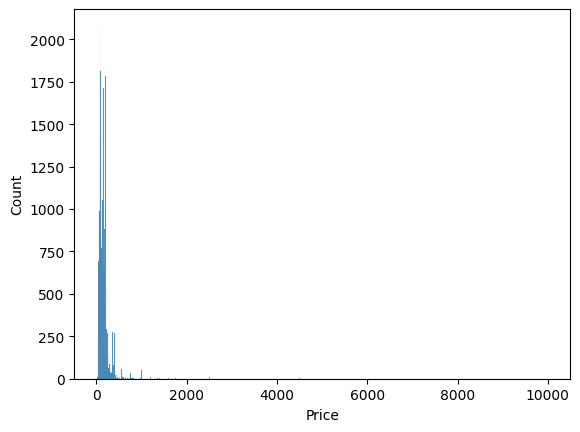

In [14]:
import seaborn as sns
sns.histplot(df['Price'])

<Axes: xlabel='Price', ylabel='Density'>

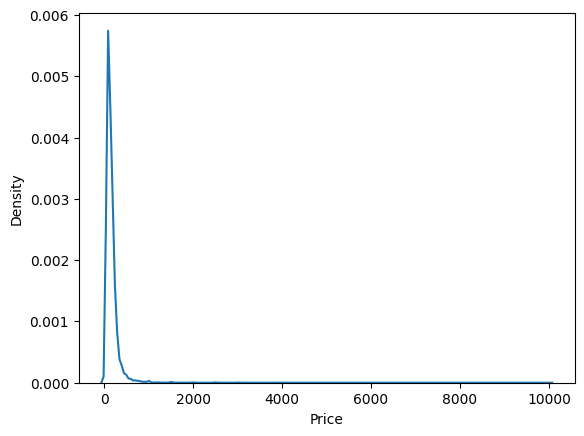

In [15]:
sns.kdeplot(df['Price'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price'>

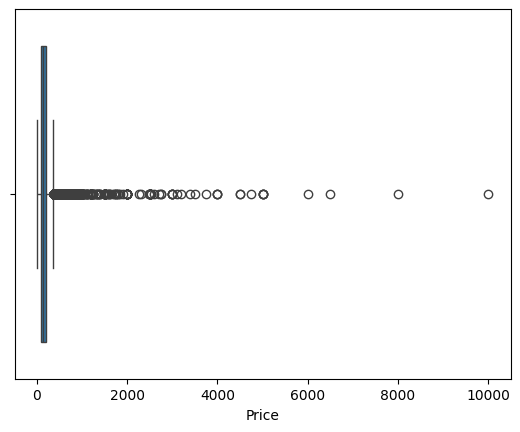

In [18]:
sns.boxplot(df,x='Price')

In [19]:
df['Price'].describe()

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


The data is badly scaled as everything is clumped on the left side of the graphs.

All the graphs are right skewed and the maximum value is significantly larger than the 75 percentile (10,000 vs 175), indicating there are outliars in the dataset.

In [21]:
import numpy as np
df['Price_log'] = np.log(df['Price'])

<Axes: xlabel='Price_log', ylabel='Count'>

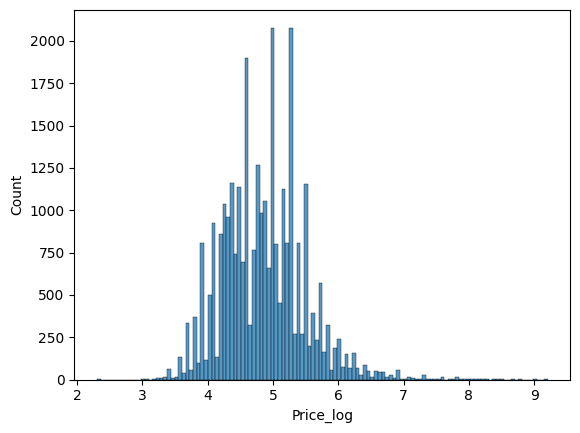

In [22]:
sns.histplot(df['Price_log'])

<Axes: xlabel='Price_log', ylabel='Density'>

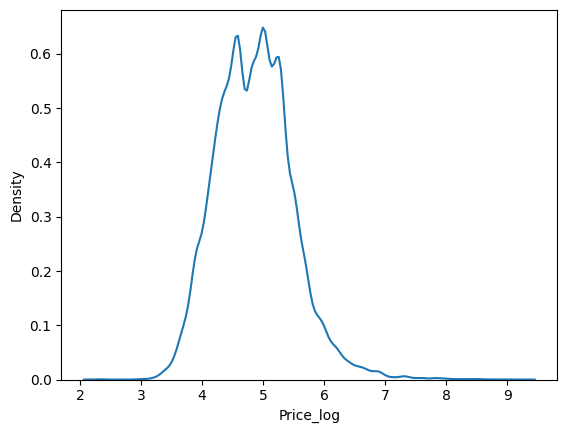

In [23]:
sns.kdeplot(df['Price_log'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Price_log'>

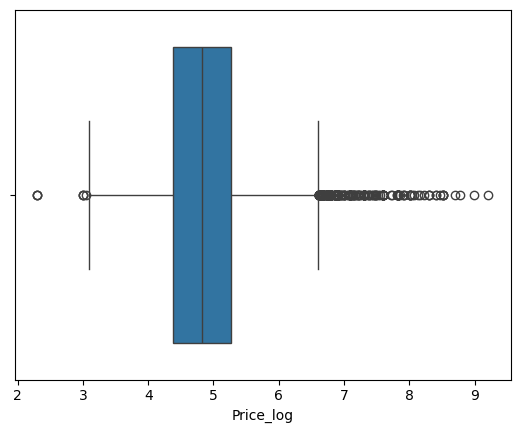

In [24]:
sns.boxplot(df,x='Price_log')

In [25]:
df['Price_log'].describe()

,Price_log
count,30478.000000
mean,4.860495
std,0.627704
min,2.302585
25%,4.382027
50%,4.828314
75%,5.273000
max,9.210340


Part 5

<Axes: xlabel='Beds', ylabel='Price_log'>

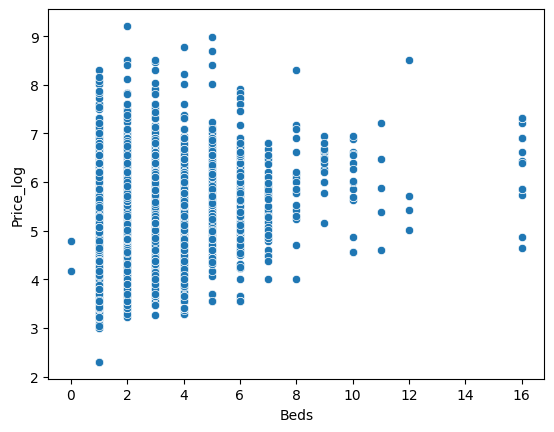

In [27]:
sns.scatterplot(data=df,x='Beds',y='Price_log')

As number of beds increases, price generally seems to increase. After 6 beds, however, this pattern seems to be less obvious. Additionally, between 12-16 beds, there seems to be no data available.

In [28]:
df.loc[:,['Beds','Price']].groupby('Beds').describe()

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

Similar to the graph, average price and standard deviation seem to increase until 6 beds, at which point there is no consistent pattern. Additionally, there is no data available between 12 and 16 beds.

Part 6

<Axes: xlabel='Beds', ylabel='Price_log'>

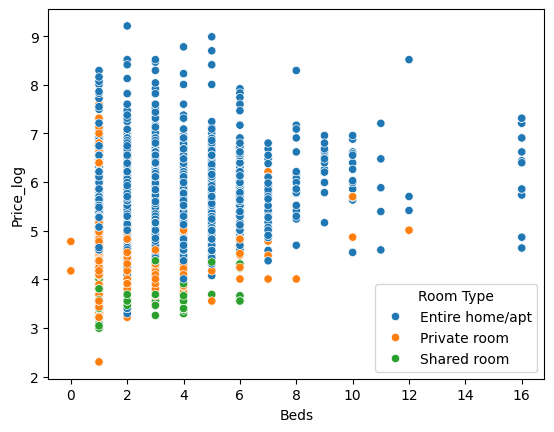

In [30]:
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Room Type')

Generally, the price of entire properties is higher than private rooms, and the price of private rooms is higher than shared rooms.

In [31]:
var = 'Price'
group = 'Room Type'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

The entire property has the highest price on average and the highest standard deviation.

In this case, the median is a more reliable estimate of central tendency because there are large outliars in the dataset which are skewing the mean.

Part 7

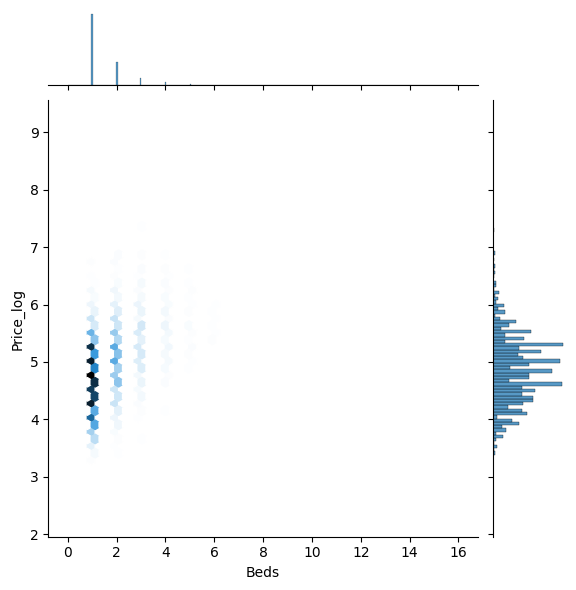

In [32]:
sns.jointplot(data=df,x='Beds',y='Price_log',kind='hex')

This graph shows that the vast majority of properties are between 1-3 beds, with a few at 3 or 4 beds as well. Additioanlly, majority pf properties are priced between 3-6 log points. Compared to the other graphs, this shows that there are a lot of outliars in the data.

**Q4.** Go to https://data.cms.gov/search.

1.   Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
2.   Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
1.   Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
2.   For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
1.   Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
2.   Create a scatter plot, and describe the relationship you see.
1.   Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.










Part 1, 2, and 3

The data picked: Medicare Monthly Enrollment Data
https://data.cms.gov/resources/medicare-monthly-enrollment-data-dictionary

The data dictionary does not define how missing observations are handled. There is actually no acknowledgement of missing data.

For categorical variables, the data dictionary does not mention any potential values or missing code values. It does neither of these things for numeric variables either.

Overall, this data dictionary does an okay job at defining all the variables. As someone with limited knowledge on the specifics of the healthcare system, there were many aspects of the definition that I did not understand and had to look up. Additionally, it misses necessary information (like missing values and example entries) to truely understand the data prior to analysis.

I would be interesting in analyzing would be "Total Aged Beneficiaries," "Total Aged Beneficiaries with ESRD" and "Total Medicare Part D Beneficiaries." I chose these variables because I was interested in seeing how much chronic disease (like ESRD) can increase prescription drug use (Part D).

In [1]:
import pandas as pd
df = pd.read_csv('/content/Medicare Monthly Enrollment Data_Sept2024.csv')
df.head()

,YEAR,MONTH,BENE_GEO_LVL,BENE_STATE_ABRVTN,BENE_STATE_DESC,BENE_COUNTY_DESC,BENE_FIPS_CD,TOT_BENES,ORGNL_MDCR_BENES,MA_AND_OTH_BENES,...,B_TOT_BENES,B_ORGNL_MDCR_BENES,B_MA_AND_OTH_BENES,PRSCRPTN_DRUG_TOT_BENES,PRSCRPTN_DRUG_PDP_BENES,PRSCRPTN_DRUG_MAPD_BENES,PRSCRPTN_DRUG_DEEMED_ELIGIBLE_FULL_LIS_BENES,PRSCRPTN_DRUG_FULL_LIS_BENES,PRSCRPTN_DRUG_PARTIAL_LIS_BENES,PRSCRPTN_DRUG_NO_LIS_BENES
0,2013,Year,National,US,National,Total,,52425659,37613096,14812563,...,47959444,33147099,14812345,35679758,22661451,13018307,10000861,1030113.0,409204.0,24239580
1,2013,Year,State,AL,Alabama,Total,01,921477.0,711448.0,210029.0,...,862992.0,652965.0,210026.0,637247.0,437749.0,199498.0,205496.0,32790.0,11452.0,387510.0
2,2013,Year,County,AL,Alabama,Autauga County,01001,9323.0,6484.0,2840.0,...,8742.0,5902.0,2840.0,6036.0,3268.0,2767.0,1839.0,296.0,105.0,3796.0
3,2013,Year,County,AL,Alabama,Baldwin County,01003,41033.0,28775.0,12258.0,...,38651.0,26393.0,12258.0,27352.0,15593.0,11759.0,5276.0,867.0,379.0,20830.0
4,2013,Year,County,AL,Alabama,Barbour County,01005,5847.0,5036.0,810.0,...,5515.0,4704.0,810.0,4170.0,3410.0,759.0,1783.0,304.0,73.0,2009.0


In [11]:
# checking for missing values
df.isnull().sum()

,0
year,0
month,0
bene_geo_lvl,0
bene_state_abrvtn,0
bene_state_desc,0
bene_county_desc,0
bene_fips_cd,0
tot_benes,0
orgnl_mdcr_benes,0
ma_and_oth_benes,0


In [3]:
# making all the variables names lower case and strings
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['year', 'month', 'bene_geo_lvl', 'bene_state_abrvtn', 'bene_state_desc',
       'bene_county_desc', 'bene_fips_cd', 'tot_benes', 'orgnl_mdcr_benes',
       'ma_and_oth_benes', 'aged_tot_benes', 'aged_esrd_benes',
       'aged_no_esrd_benes', 'dsbld_tot_benes',
       'dsbld_esrd_and_esrd_only_benes', 'dsbld_no_esrd_benes',
       'male_tot_benes', 'female_tot_benes', 'white_tot_benes',
       'black_tot_benes', 'api_tot_benes', 'hspnc_tot_benes',
       'natind_tot_benes', 'othr_tot_benes', 'age_lt_25_benes',
       'age_25_to_44_benes', 'age_45_to_64_benes', 'age_65_to_69_benes',
       'age_70_to_74_benes', 'age_75_to_79_benes', 'age_80_to_84_benes',
       'age_85_to_89_benes', 'age_90_to_94_benes', 'age_gt_94_benes',
       'dual_tot_benes', 'full_dual_tot_benes', 'part_dual_tot_benes',
       'nodual_tot_benes', 'a_b_tot_benes', 'a_b_orgnl_mdcr_benes',
       'a_b_ma_and_oth_benes', 'a_tot_benes', 'a_orgnl_mdcr_benes',
       'a_ma_and_oth_benes', 'b_tot_benes', 'b_orgnl_md

In [4]:
# checking if the variables are numeric
numeric_status = df.dtypes.apply(pd.api.types.is_numeric_dtype)
print(numeric_status)

year                                             True
month                                           False
bene_geo_lvl                                    False
bene_state_abrvtn                               False
bene_state_desc                                 False
bene_county_desc                                False
bene_fips_cd                                    False
tot_benes                                       False
orgnl_mdcr_benes                                False
ma_and_oth_benes                                False
aged_tot_benes                                  False
aged_esrd_benes                                 False
aged_no_esrd_benes                              False
dsbld_tot_benes                                 False
dsbld_esrd_and_esrd_only_benes                  False
dsbld_no_esrd_benes                             False
male_tot_benes                                  False
female_tot_benes                                False
white_tot_benes             

In [9]:
# converting relevant variables to be numeric (or since they are decimals, converted them into floats)
df['aged_tot_benes'] = pd.to_numeric(df['aged_tot_benes'], errors='coerce')
df['prscrptn_drug_tot_benes'] = pd.to_numeric(df['prscrptn_drug_tot_benes'], errors='coerce')
df['aged_esrd_benes'] = pd.to_numeric(df['aged_esrd_benes'], errors='coerce')

print(df[['aged_tot_benes', 'prscrptn_drug_tot_benes', 'aged_esrd_benes']].dtypes)

aged_tot_benes             float64
prscrptn_drug_tot_benes    float64
aged_esrd_benes            float64
dtype: object


In [10]:
# checking for duplicate values
df.duplicated().sum()

0

Part 4

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='aged_tot_benes'>

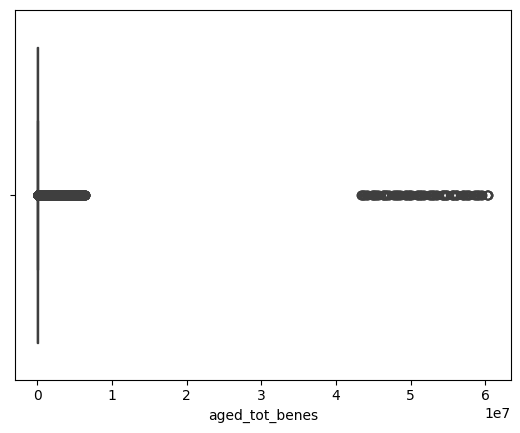

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df, x='aged_tot_benes')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='prscrptn_drug_tot_benes'>

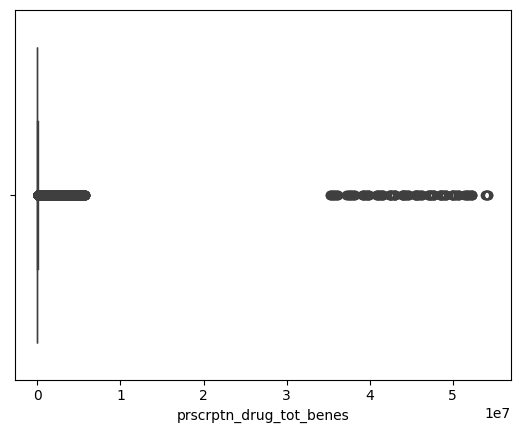

In [14]:
sns.boxplot(data=df, x='prscrptn_drug_tot_benes')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='aged_esrd_benes'>

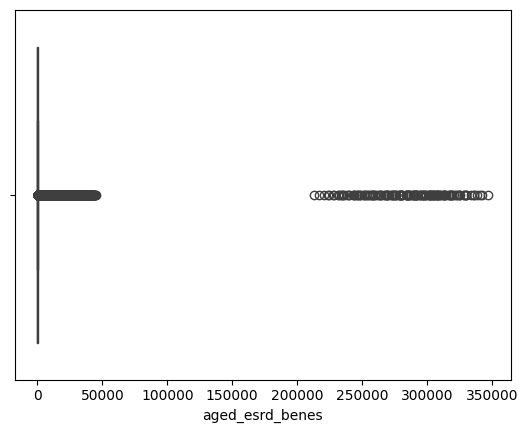

In [15]:
sns.boxplot(data=df, x='aged_esrd_benes')

All three boxplots demonstrated that there are large outliars, skewing the data.

Part 5

<Axes: xlabel='aged_tot_benes', ylabel='Count'>

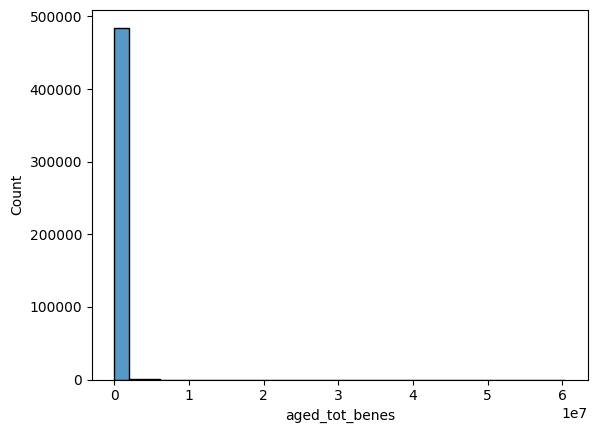

In [19]:
sns.histplot(df['aged_tot_benes'], bins=30)

<Axes: xlabel='aged_tot_benes', ylabel='Density'>

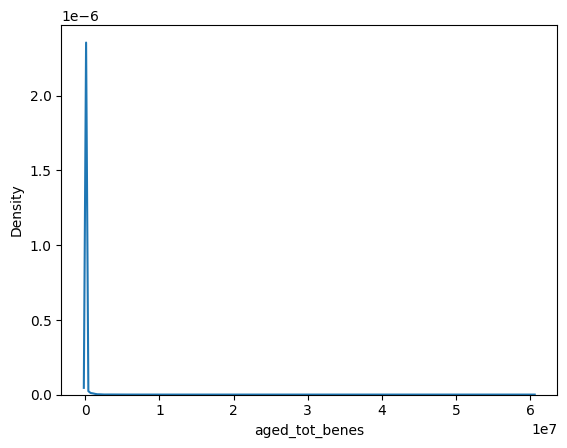

In [20]:
sns.kdeplot(df['aged_tot_benes'])

<Axes: xlabel='prscrptn_drug_tot_benes', ylabel='Count'>

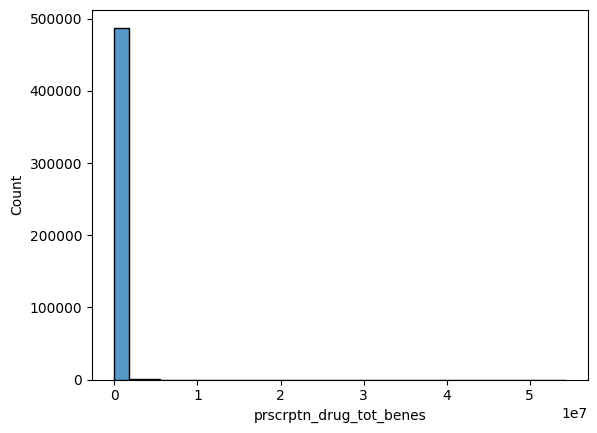

In [21]:
sns.histplot(df['prscrptn_drug_tot_benes'], bins=30)

<Axes: xlabel='prscrptn_drug_tot_benes', ylabel='Density'>

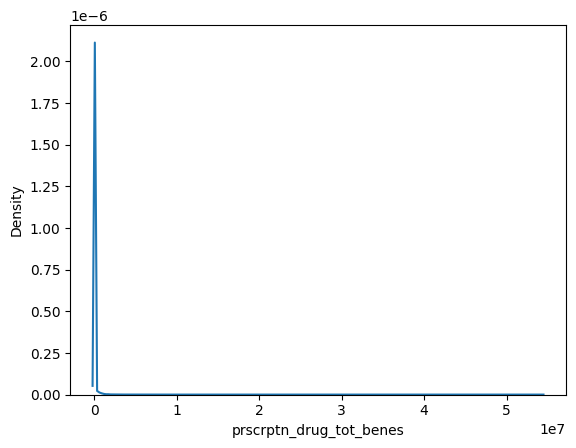

In [22]:
sns.kdeplot(df['prscrptn_drug_tot_benes'])

<Axes: xlabel='aged_esrd_benes', ylabel='Count'>

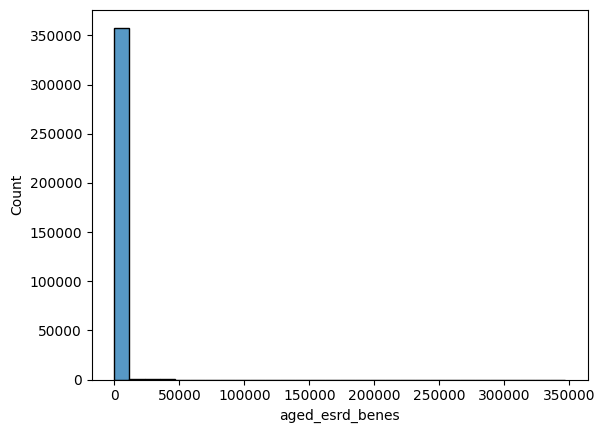

In [23]:
sns.histplot(df['aged_esrd_benes'], bins=30)

<Axes: xlabel='aged_esrd_benes', ylabel='Density'>

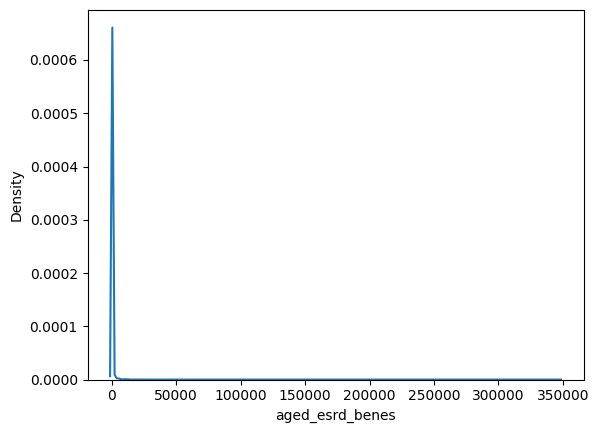

In [24]:
sns.kdeplot(df['aged_esrd_benes'])

Since there are such large outliars within each of the variables it is hard to make any conclusions from these graphs. Additionally, they must be rescaled in order to understand.

Part 6

<Axes: xlabel='aged_tot_benes', ylabel='prscrptn_drug_tot_benes'>

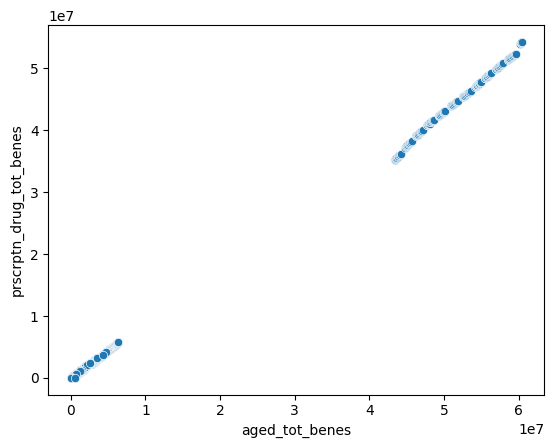

In [25]:
sns.scatterplot(data=df, x='aged_tot_benes', y='prscrptn_drug_tot_benes')

<Axes: xlabel='aged_tot_benes', ylabel='aged_esrd_benes'>

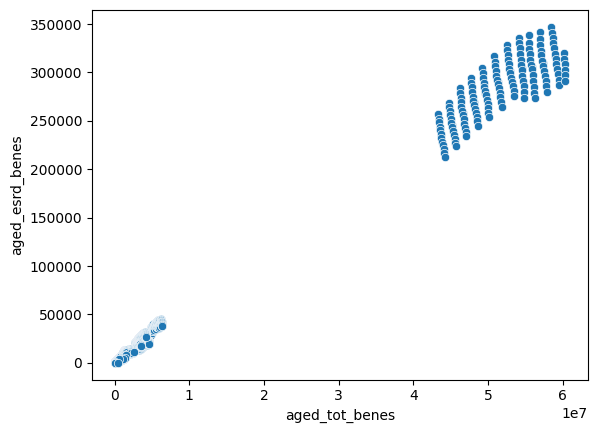

In [26]:
sns.scatterplot(data=df, x='aged_tot_benes', y='aged_esrd_benes')

<Axes: xlabel='prscrptn_drug_tot_benes', ylabel='aged_esrd_benes'>

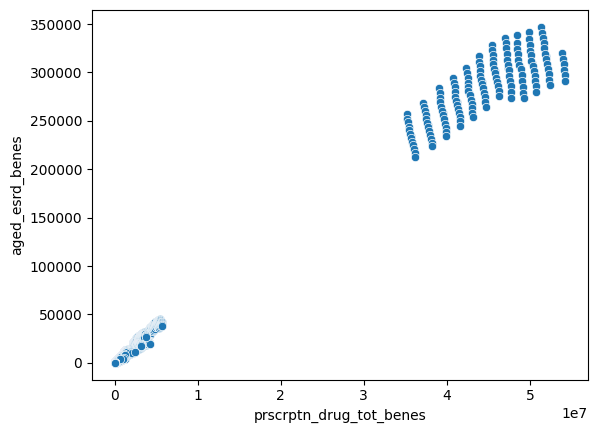

In [27]:
sns.scatterplot(data=df, x='prscrptn_drug_tot_benes', y='aged_esrd_benes')

Based on these graphs, there seems to be missing data in the middle of each of them. But, generally, each variable seems to have a positive relationship.

Part 7

In [29]:
summary_stats = df[['aged_esrd_benes', 'aged_tot_benes', 'prscrptn_drug_tot_benes']].describe()
print(summary_stats)

       aged_esrd_benes  aged_tot_benes  prscrptn_drug_tot_benes
count    359109.000000    4.856280e+05             4.887460e+05
mean        351.691347    4.742237e+04             4.071706e+04
std        5963.207767    9.276694e+05             7.990169e+05
min           0.000000    0.000000e+00             0.000000e+00
25%          20.000000    2.191000e+03             1.867000e+03
50%          37.000000    4.946000e+03             4.379000e+03
75%          92.000000    1.294500e+04             1.109100e+04
max      347185.000000    6.039897e+07             5.429266e+07


Based on these results, it is clear that all of these variables have large outliars. Additionally, the mean is signficantly larger than the median, making it unreliable measure of central tendency. This aligns with what I saw in graphs, that they are all right-skewed. Lastly, all three of the variables have large standard deviation compared to the mean, indicating there is a large spread in the data, which is consistent with the graphs.